# K Nearest Neighbor
## A movie-ing target

## Friend inventory
### Use handout

![bullseye3](img/bullseye2.png)

## Friend Inventory
### What would each person choose?

![movies](img/movies.png)

## Friend Inventory
### Decision majority by ring

If you just polled the inner ring of people, what movie would you end up seeing?
- How about if you polled the first *and* second ring?
- The first three rings?
- All of it?

Share with your neighbor what movie you'd end up seeing.

## Friend Inventory
### What did you end up seeing?

Who's movie choices changed based on how many people you polled?
![movies](img/movies.png)



## Friend Inventory
### What's the "algorithm" we used for this process, in normal words?

### How does this relate to K nearest neighbor(knn)?

![annotate](img/bullseye-annotate.png)

# Starting Off

We are going to revisit the pima native Americans diabetes dataset. Can we use knn to classify people correctly and then predict if someone will have diabetes?

# Implementing a K-Nearest Neighbors Model

## Objective: 
- To be able to implement a KNN classification model, and utilize a visualization to identify the best value of K.

## Agenda

- What is the **K-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## K-nearest neighbors (KNN) classification

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

It's like, looking at the ones that are the closest, and voting by majority.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?

### What should the grey point be?

<img src='img/scenario.png' width=500/>

## KNN has the following basic steps:

<img src='img/knn-process.png' width=500/>

### Voting

How to break ties:

1. When doing a binary classification, often use an odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### KNN classification map (K=1)

![1NN classification map](img/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](img/04_5nn_map.png)

## A bit more math

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



## A bit more math
### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](img/euclidean-distance.png)

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](img/vectorgraph.jpg)

## A bit more math
### Euclidean Distance Equation
![alt text](img/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

## Implementing the KNN Classifier with SKlearn

## Reviewing the Pima dataset

## Loading the data


[following this analysis for part of this section](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

The Question creeping out of this summary
- Can minimum value of below listed columns be zero (0)?
- On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [1]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('diabetes.csv')

In [39]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
import matplotlib as plt
import seaborn as sns

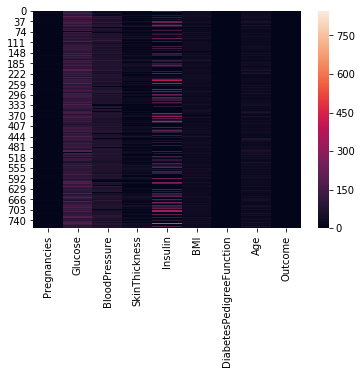

In [3]:
sns.heatmap(diabetes)

In [4]:
diabetes_copy = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

In [5]:
diabetes_copy = diabetes_copy.replace(0, np.NaN)

In [44]:
diabetes_copy.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [6]:
diabetes_copy['Glucose'] = diabetes_copy['Glucose'].fillna(
    diabetes_copy['Glucose'].mean(), inplace=False)
diabetes_copy['BloodPressure'] = diabetes_copy['BloodPressure'].fillna(
    diabetes_copy['BloodPressure'].mean(), inplace=False)
diabetes_copy['SkinThickness'] = diabetes_copy['SkinThickness'].fillna(
    diabetes_copy['SkinThickness'].mean(), inplace=False)
diabetes_copy['Insulin'] = diabetes_copy['Insulin'].fillna(
    diabetes_copy['Insulin'].mean(), inplace=False)
diabetes_copy['BMI'] = diabetes_copy['Insulin'].fillna(
    diabetes_copy['BMI'].mean(), inplace=False)

In [46]:
diabetes_copy.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,155.548223
std,30.435949,12.096346,8.790942,85.021108,85.021108
min,44.000000,24.000000,7.000000,14.000000,14.000000
25%,99.750000,64.000000,25.000000,121.500000,121.500000
50%,117.000000,72.202592,29.153420,155.548223,155.548223
75%,140.250000,80.000000,32.000000,155.548223,155.548223
max,199.000000,122.000000,99.000000,846.000000,846.000000


In [7]:
y = diabetes.Outcome

In [8]:
X = diabetes_copy

In [9]:
X.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,155.548223
std,30.435949,12.096346,8.790942,85.021108,85.021108
min,44.000000,24.000000,7.000000,14.000000,14.000000
25%,99.750000,64.000000,25.000000,121.500000,121.500000
50%,117.000000,72.202592,29.153420,155.548223,155.548223
75%,140.250000,80.000000,32.000000,155.548223,155.548223
max,199.000000,122.000000,99.000000,846.000000,846.000000


In [10]:
X['DiabetesPedigreeFunction'] = diabetes['DiabetesPedigreeFunction']
X['Age'] = diabetes['Age']
X['Pregnancies'] = diabetes['Pregnancies']

In [11]:
X.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,155.548223,0.471876,33.240885,3.845052
std,30.435949,12.096346,8.790942,85.021108,85.021108,0.331329,11.760232,3.369578
min,44.000000,24.000000,7.000000,14.000000,14.000000,0.078000,21.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,121.500000,0.243750,24.000000,1.000000
50%,117.000000,72.202592,29.153420,155.548223,155.548223,0.372500,29.000000,3.000000
75%,140.250000,80.000000,32.000000,155.548223,155.548223,0.626250,41.000000,6.000000
max,199.000000,122.000000,99.000000,846.000000,846.000000,2.420000,81.000000,17.000000


In [12]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [13]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 118 to 37
Data columns (total 8 columns):
Glucose                     576 non-null float64
BloodPressure               576 non-null float64
SkinThickness               576 non-null float64
Insulin                     576 non-null float64
BMI                         576 non-null float64
DiabetesPedigreeFunction    576 non-null float64
Age                         576 non-null int64
Pregnancies                 576 non-null int64
dtypes: float64(6), int64(2)
memory usage: 40.5 KB


### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [30]:
X_train

array([[-0.82444694, -0.97523127, -0.67246728, ..., -0.07502996,
        -0.94438203,  0.06459212],
       [-0.35655251, -0.02533405, -0.09648881, ..., -0.18379061,
        -0.5204699 ,  0.36223259],
       [ 1.94949858,  1.39951178, -0.3268802 , ..., -0.46475564,
         0.15778952, -1.12596979],
       ...,
       [ 0.14476294,  1.39951178,  0.03638016, ...,  0.34792815,
         0.7512665 ,  2.74335641],
       [ 1.64870931, -0.02533405,  0.03638016, ...,  0.0337307 ,
        -0.60525232,  0.06459212],
       [-0.65734178,  0.29129836,  0.94027242, ...,  0.59566076,
         1.09039621,  1.5527945 ]])

## scikit-learn 4-step modeling pattern

![steps](img/sklearnsteps.png)

**Step 1:** Import the class you plan to use

In [31]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

**Class specifications**
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [33]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [36]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [37]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7083333333333334
F1: 0.5882352941176471


In [38]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[96 27]
 [29 40]]


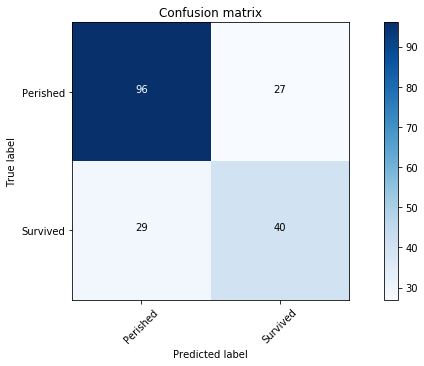

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Using a different value for K

In [41]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [42]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7916666666666666
F1: 0.6875


In [43]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.75      0.64      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



Confusion Matrix, without normalization
[[108  15]
 [ 25  44]]


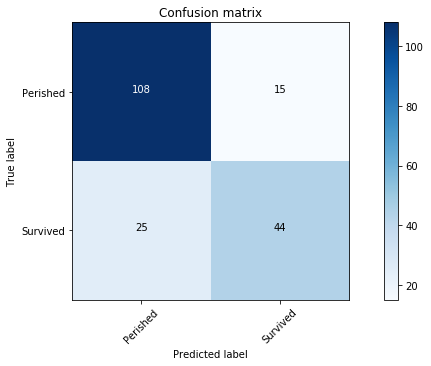

In [44]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Search for an optimal value of K for KNN


In [53]:
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7073648007590133, 0.698659783062161, 0.7604907089677994, 0.7421657266091573, 0.78759765625, 0.7615976961760768, 0.7593194980694981, 0.752207249070632, 0.7604907089677994, 0.7553165133978119]


#### Visual comparison of different $K$s

This is not an ROC curve

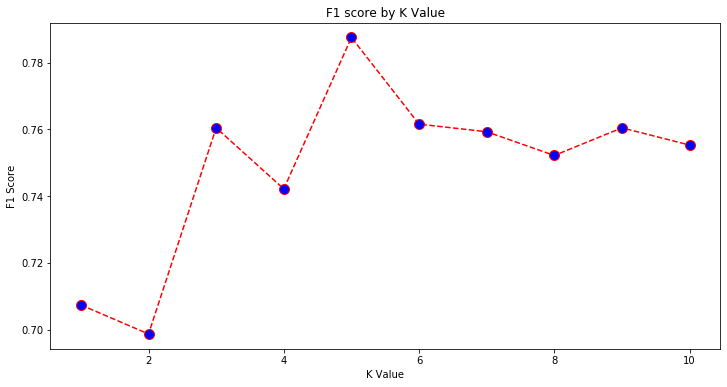

In [54]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of K performs best on our Test data?

Here we use F score, what other metrics could we use?

### How do you think K size relates to our concepts of bias and variance?

![alt text](img/K-NN_Neighborhood_Size_print.png)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)